# World Databank GDP per Capita

In this document we are going to explore the data of GDP per capita. For doing that we will use the package `wbdata`. We are going to display the data as time series as well as in a map.

In [1]:
import wbdata
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]

First, let's see the GDP per capita of the world from 1990 to 2020.

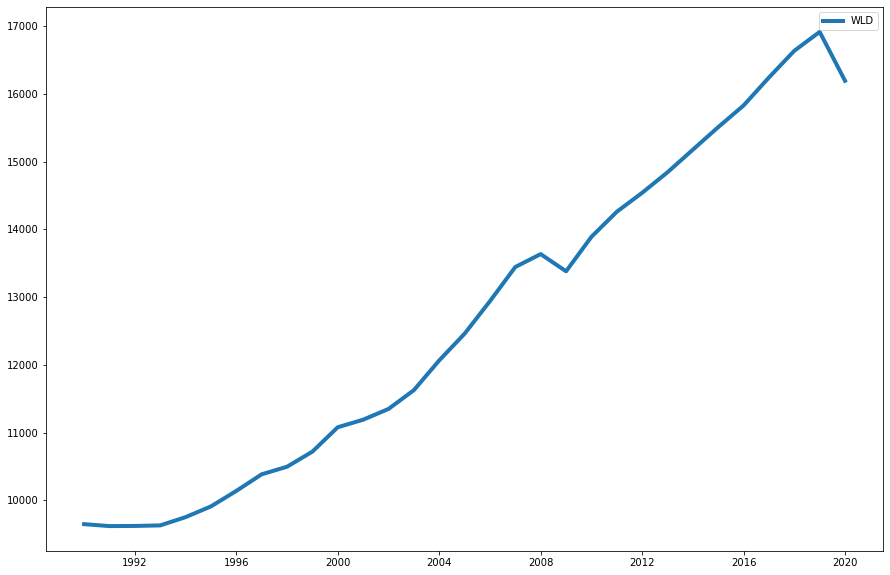

In [2]:
start_year=1990
end_year=2021
countries = ["WLD"]
indicator = {"NY.GDP.PCAP.PP.KD": "gdppc"} 
data_date = datetime.datetime(start_year, 1, 1), datetime.datetime(end_year, 1, 1) 

#get info
wbdata_info = wbdata.get_dataframe(indicator, country=countries, convert_date=True, data_date=data_date)
wbdata_info=wbdata_info.reset_index()

#plot data
plt.plot(wbdata_info['date'], wbdata_info["gdppc"] , linewidth=4)
plt.legend(countries)
plt.show()

## Metadata

Before continuing, we will explain two aspects of `wbdata`.
* Country Information
* Indicators 

### Country Information

In [3]:
countries_info=pd.DataFrame(wbdata.get_country())
region_name=countries_info['region'].apply(lambda x: x['value'])
countries_info['region_name']=region_name
countries_info.head()

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,region_name
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167,Latin America & Caribbean
1,AFE,ZH,Africa Eastern and Southern,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,,Aggregates
2,AFG,AF,Afghanistan,"{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228,South Asia
3,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,,Aggregates
4,AFW,ZI,Africa Western and Central,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,,Aggregates


In [4]:
#Show country info
print("Columns: ")
print(countries_info.columns.tolist())
print("\n ")
#Show regions
print("Regions: ")
print(set(region_name.tolist()))
print("\n ")
#Show income levels
print("Income levels: ")
pd.DataFrame(wbdata.get_incomelevel() )

Columns: 
['id', 'iso2Code', 'name', 'region', 'adminregion', 'incomeLevel', 'lendingType', 'capitalCity', 'longitude', 'latitude', 'region_name']

 
Regions: 
{'Aggregates', 'North America', 'East Asia & Pacific', 'Latin America & Caribbean ', 'Europe & Central Asia', 'South Asia', 'Middle East & North Africa', 'Sub-Saharan Africa '}

 
Income levels: 


,id,iso2code,value
0,HIC,XD,High income
1,INX,XY,Not classified
2,LIC,XM,Low income
3,LMC,XN,Lower middle income
4,LMY,XO,Low & middle income
5,MIC,XP,Middle income
6,UMC,XT,Upper middle income


### Indicators

The other aspect is the different indicators. The indicators are grouped by their source of data.

For example, let's list the different source of data.

In [5]:
wbsource=pd.DataFrame(wbdata.get_source() )
wbsource.head()

,id,lastupdated,name,code,description,url,dataavailability,metadataavailability,concepts
0,1,2021-08-18,Doing Business,DBS,,,Y,Y,3
1,2,2021-09-15,World Development Indicators,WDI,,,Y,Y,3
2,3,2021-09-27,Worldwide Governance Indicators,WGI,,,Y,Y,3
3,5,2016-03-21,Subnational Malnutrition Database,SNM,,,Y,Y,3
4,6,2021-01-21,International Debt Statistics,IDS,,,Y,Y,4


From the source "Doing Business" (with id=1) we can obtain several indicators:

In [6]:
indicators=pd.DataFrame(wbdata.get_indicator(source=1) )
indicators.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,ENF.CONT.COEN.ATDR,Enforcing contracts: Alternative dispute resol...,,"{'id': '1', 'value': 'Doing Business'}",The alternative dispute resolution evaluates t...,,[]
1,ENF.CONT.COEN.ATFE.PR,Enforcing contracts: Attorney fees (% of claim),,"{'id': '1', 'value': 'Doing Business'}",The attorney fees are the fees that plaintiff ...,,[]
2,ENF.CONT.COEN.COST.ZS,Enforcing contracts: Cost (% of claim),,"{'id': '1', 'value': 'Doing Business'}",The cost to enforce contracts is recorded as a...,,[]
3,ENF.CONT.COEN.COST.ZS.DFRN,Enforcing contracts: Cost (% of claim) - Score,,"{'id': '1', 'value': 'Doing Business'}",The score for cost to enforce contracts benchm...,,[]
4,ENF.CONT.COEN.CSMG,Enforcing contracts: Case management (0-6) (DB...,,"{'id': '1', 'value': 'Doing Business'}",The case management evaluates six aspects of t...,,[]


Alternatively we can search the indicators by using the `search_indicators` function. For example, we can search for indicators that measure the "unemployment".

In [7]:
indicator=pd.DataFrame(wbdata.search_indicators("unemployment") )
indicator.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,JI.UEM.1524.FE.ZS,"Youth unemployment rate, aged 15-24, female (%...",,"{'id': '86', 'value': 'Global Jobs Indicators ...",,,[]
1,JI.UEM.1524.HE.ZS,"Youth unemployment rate, aged 15-24, above pri...",,"{'id': '86', 'value': 'Global Jobs Indicators ...",,,[]
2,JI.UEM.1524.LE.ZS,"Youth unemployment rate, aged 15-24, primary e...",,"{'id': '86', 'value': 'Global Jobs Indicators ...",,,[]
3,JI.UEM.1524.MA.ZS,"Youth unemployment rate, aged 15-24, male (% o...",,"{'id': '86', 'value': 'Global Jobs Indicators ...",,,[]
4,JI.UEM.1524.RU.ZS,"Youth unemployment rate, aged 15-24, rural (% ...",,"{'id': '86', 'value': 'Global Jobs Indicators ...",,,[]


In this document we are going to use the indicator of GDP per capita "NY.GDP.PCAP.PP.KD". We can see more information by using the `get_indicator` function.

In [8]:
gdppc=pd.DataFrame(wbdata.get_indicator("NY.GDP.PCAP.PP.KD") )
print(gdppc.loc[0]["name"])
gdppc.head()

GDP per capita, PPP (constant 2017 international $)


,id,name,unit,source,sourceNote,sourceOrganization,topics
0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,"{'id': '2', 'value': 'World Development Indica...",GDP per capita based on purchasing power parit...,"International Comparison Program, World Bank |...","[{'id': '3', 'value': 'Economy & Growth'}]"


## Time series

On the first analysis we are going to see the evolution of the GDP per capita of some countries.

First we build a function to plot the time series

In [9]:
def plot_indicator_time(indicator,countries,start_year,end_year):
    data_date = datetime.datetime(start_year, 1, 1), datetime.datetime(end_year, 1, 1)
    indicator_name=list(indicator.values())[0]
    #Get info
    wbdata_info = wbdata.get_dataframe(indicator, country=countries, convert_date=True, data_date=data_date)
    #Transform data to have a country in each column
    if len(countries)==1:
        wbdata_info["country"]=countries[0]
    wbdata_info_countr=wbdata_info.reset_index()
    wbdata_info_countr=wbdata_info_countr.pivot(index='date', columns='country', values=indicator_name)
    wbdata_info_countr=wbdata_info_countr.reset_index()
    #Plot!
    country_names=list(set(wbdata_info_countr.columns) - set(["country" ,"date"]) )
    plt.plot(wbdata_info_countr['date'], wbdata_info_countr[country_names] , linewidth=5)
    plt.legend(country_names)
    plt.show()

We then provide the indicator, countries and time range to plot

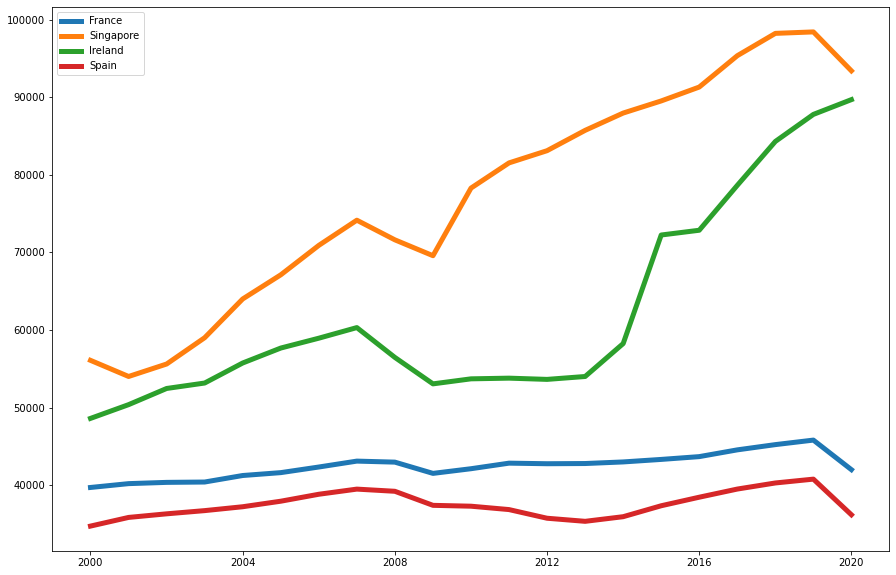

In [10]:
start_year=2000
end_year=2021
indicator = {"NY.GDP.PCAP.PP.KD": "gdppc"} 
data_date = datetime.datetime(start_year, 1, 1), datetime.datetime(end_year, 1, 1) 

countries = ["ESP","FRA","IRL","SGP"]
plot_indicator_time(indicator,countries,start_year,end_year)

## Maps

The second analysis will deal with the map. The countries on the map will be color-coded according to their GDP per capita.

In [11]:
import geopandas as gpd
import numpy as np; 
import matplotlib.pyplot as plt 

Create a function to plot the map:

In [12]:

#This has as input a dictionary (id_value_dict) maping the value of the indicator to the country codes
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 

def plot_map(id_value_dict):
    gdf["indicator"]=gdf["iso_a3"].apply(lambda x: id_value_dict.get(x,float('nan')) )
    fig, ax = plt.subplots()
    gdf.plot(column='indicator', cmap='summer',scheme="natural_breaks", legend=True, ax=ax , missing_kwds={'color': 'lightgrey'})
    plt.show()

Note: The variable `gdf` contains the code, name and polygon of the countries. However some countries do not have the proper code "iso_a3" (`gdf[gdf["iso_a3"]=="-99"]`) so we make a small fix.

In [13]:
gdf.at[gdf[gdf["name"]=="France"].index,'iso_a3']='FRA'
gdf.at[gdf[gdf["name"]=="Norway"].index,'iso_a3']='NOR'

Then, obtain the data and transform and map the values to their country code:

In [14]:
# get info
year=2010
indicator = {"NY.GDP.PCAP.PP.KD": "gdppc"}

indicator_name=list(indicator.values())[0]
data_date = datetime.datetime(year, 1, 1), datetime.datetime(year, 1, 1) 
wbdata_info = wbdata.get_dataframe(indicator, convert_date=True, data_date=data_date).reset_index()

#Map the values of the indicator to the country code
countries_info=pd.DataFrame(wbdata.get_country())
country_id_name=dict(zip(countries_info["name"], countries_info["id"])) #get a dictionary country  - code
wbdata_info["id"]=wbdata_info["country"].apply(lambda x: country_id_name.get(x,"NA") )
country_indicator_dict=dict(zip(wbdata_info["id"], wbdata_info[indicator_name])) #get a dictionary code  - value

After that, we can plot the information in a map:

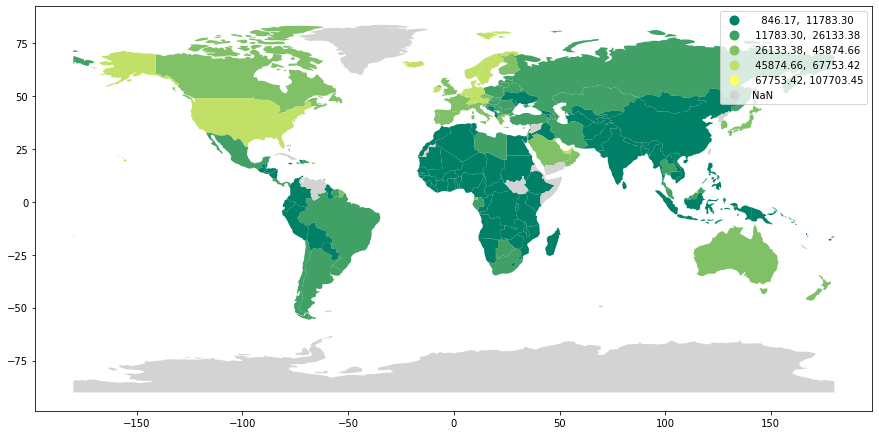

In [15]:
plot_map(country_indicator_dict)

## References
* wbdata documentation: https://wbdata.readthedocs.io/en/stable/
* Geopandas: https://geopandas.org/docs/user_guide/mapping.html